In [1]:
import lasagne
import theano
import theano.tensor as T
import numpy as np
from scipy.io import loadmat

In [2]:
matfil = loadmat("./MATLAB/test.mat")

In [3]:
X = matfil['A']['d'][0][0]

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

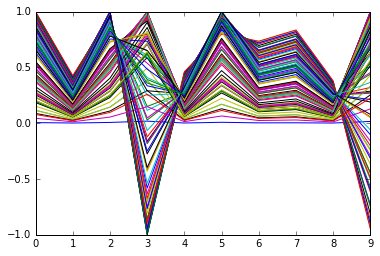

In [5]:
plt.plot(X.T)

In [6]:
x = X[:,:-1]
y = X[:,1:]

In [7]:
x.shape,y.shape

((100, 9), (100, 9))

In [8]:
x = x.astype(np.float32)

In [14]:
NUM_INPUTS = 1
NUM_UNITS_ENC = 2

In [10]:
#symbolic theano variables. Note that we are using imatrix for X since it goes into the embedding layer
x_sym = T.matrix()

In [11]:
x[:,:,None].shape

(100, 9, 1)

In [33]:
x_sym = T.ftensor3()
y_sym = T.ftensor3()

In [15]:
l_in = lasagne.layers.InputLayer((None,9,1))
l_enc = lasagne.layers.GRULayer(l_in, num_units=NUM_UNITS_ENC, name='GRUEncoder')
print(lasagne.layers.get_output(l_enc, inputs={l_in: x_sym}).eval(
    {x_sym: x[:,:,None]}).shape)

(100, 9, 2)


In [34]:
# cost function
predicted_values = lasagne.layers.get_output(l_enc)
cost = T.mean(abs(predicted_values[:,:,0] - y_sym))

In [31]:
all_parameters = lasagne.layers.get_all_params([l_enc], trainable=True)
#add grad clipping to avoid exploding gradients
all_grads = [T.clip(g,-3,3) for g in T.grad(cost, all_parameters)]
all_grads = lasagne.updates.total_norm_constraint(all_grads,3)
updates = lasagne.updates.adam(all_grads, all_parameters, learning_rate=0.005)

In [37]:
train_func = theano.function([x_sym, y_sym], [cost, predicted_valuesed_values], updates=updates)
#since we don't have any stochasticity in the network we will just use the training graph without any updates given
test_func = theano.function([x_sym, y_sym, xmask_sym], [acc, output_decoder_train])

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 0 is not part of the computational graph needed to compute the outputs: <TensorType(float32, 3D)>.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [ ]:
val_interval = 5000
samples_to_process = 3e5
samples_processed = 0

val_samples = []
costs, accs = [], []
plt.figure()
try:
    while samples_processed < samples_to_process:
        x_, x_masks_, ys_, y_masks_, _, _ = \
            get_batch(batch_size=BATCH_SIZE,max_digits=MAX_DIGITS,min_digits=MIN_DIGITS)
        batch_cost, batch_acc, batch_output = train_func(x_, ys_, x_masks_)
        costs += [batch_cost]
        samples_processed += BATCH_SIZE
        #validation data
        if samples_processed % val_interval == 0:
            #print "validating"
            val_acc, val_output = test_func(Xval, Yval, Xmask_val)
            val_samples += [samples_processed]
            accs += [val_acc]
            plt.plot(val_samples,accs)
            plt.ylabel('Validation Accuracy', fontsize=15)
            plt.xlabel('Processed samples', fontsize=15)
            plt.title('', fontsize=20)
            plt.grid('on')
            plt.savefig("out.png")
            display.display(display.Image(filename="out.png"))
            display.clear_output(wait=True)
except KeyboardInterrupt:
    pass

In [17]:
tmp = lasagne.layers.get_output(l_enc, inputs={l_in: x_sym}).eval(
    {x_sym: x[:,:,None]})

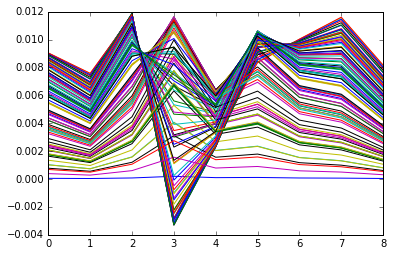

In [24]:
plt.plot(tmp[:,:,1].T)